In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [3]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [4]:
# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [5]:
# Initialize model, loss function, and optimizer
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
# Initialize a list to store the average loss for each epoch
epoch_losses = []  # This must be defined before the training loop

# Training loop
epochs = 5
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    model.train()
    running_loss = 0.0

    for batch in train_loader:
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Compute average loss for this epoch and store it
    avg_loss = running_loss / len(train_loader)
    epoch_losses.append(avg_loss)  # Ensure this line is in the loop
    print(f"Loss after epoch {epoch+1}: {avg_loss:.4f}")


Epoch 1/5
Loss after epoch 1: 0.3983
Epoch 2/5
Loss after epoch 2: 0.1920
Epoch 3/5
Loss after epoch 3: 0.1419
Epoch 4/5
Loss after epoch 4: 0.1162
Epoch 5/5
Loss after epoch 5: 0.0979


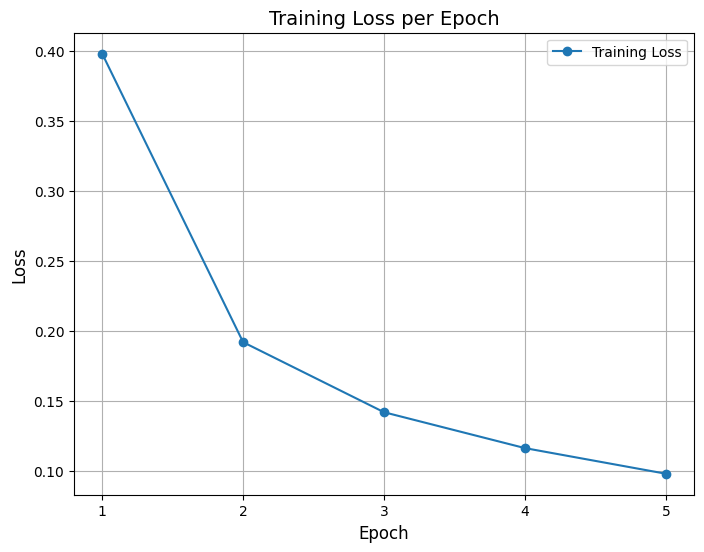

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), epoch_losses, marker='o', label='Training Loss')
plt.title("Training Loss per Epoch", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.xticks(range(1, epochs + 1))
plt.legend()
plt.grid()
plt.show()
